In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [2]:
data = pd.read_csv(R'C:\Users\saime\Desktop\Datasets\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Sum of values equal zero in each column
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [5]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


<AxesSubplot:xlabel='Age', ylabel='Count'>

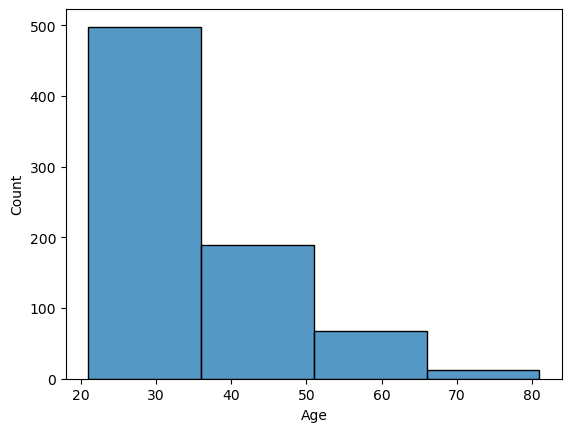

In [6]:
sns.histplot(data=data,x='Age', bins=4)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

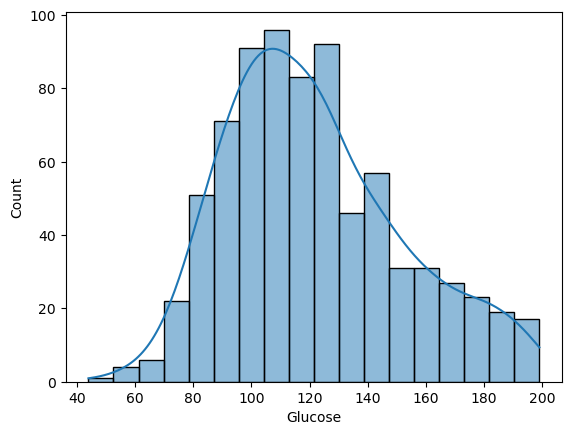

In [7]:
sns.histplot(data=data,x='Glucose', kde=True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

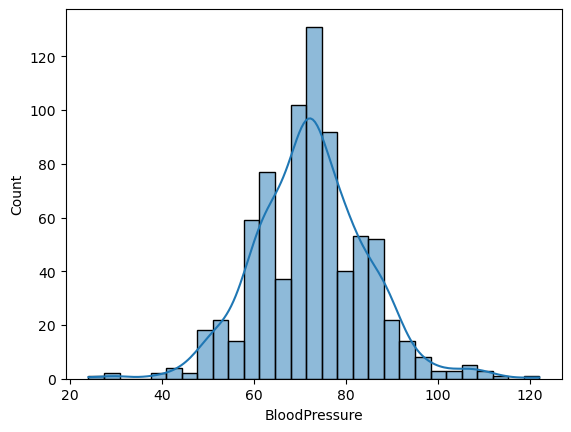

In [8]:
sns.histplot(data=data,x='BloodPressure', kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

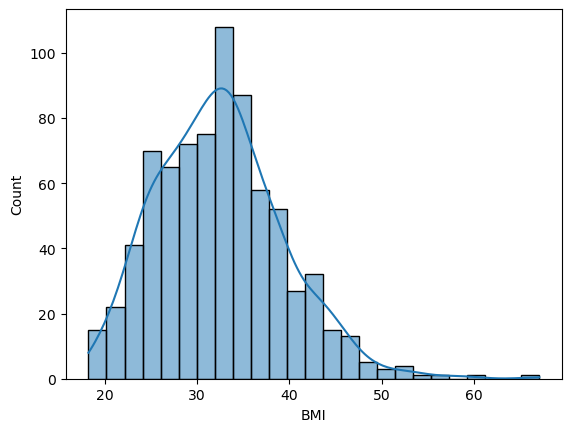

In [9]:
sns.histplot(data=data,x='BMI', kde=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

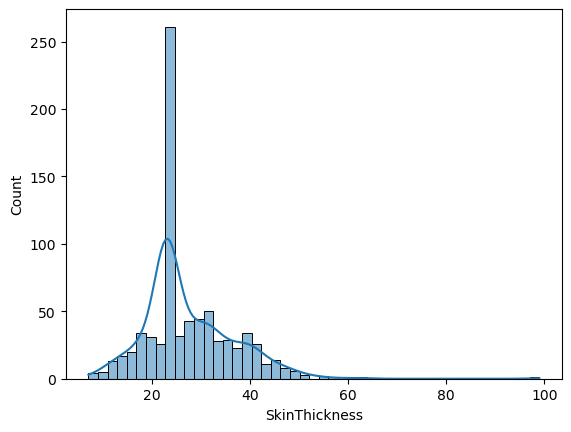

In [10]:
sns.histplot(data=data,x='SkinThickness', kde=True)

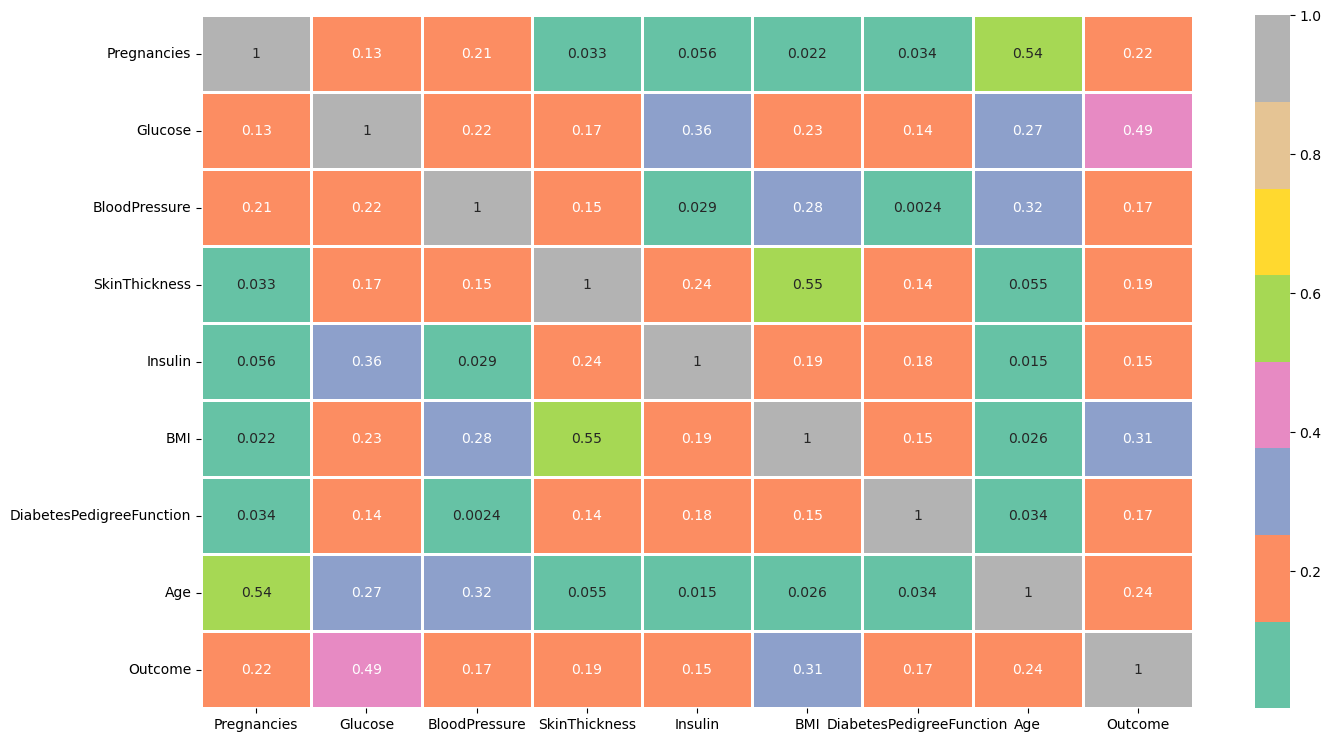

In [11]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(abs(corr), lw=1, annot=True, cmap='Set2')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.iloc[:,:8]
Y = data.iloc[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=7)

SScaler = StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.fit_transform(X_test)

In [47]:
def impressions(model,accuracy):
    print('Accuracy: {} %'.format(accuracy))
    print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [60]:
def roc_curve(Y_test, Y_score):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
    score = metrics.auc(fpr, tpr)

    fig = px.area(
        #fpr = False Positive Rate; tpr= True Positive Rate
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()   

Accuracy: 77.273 %
Mean squared error:  0.227


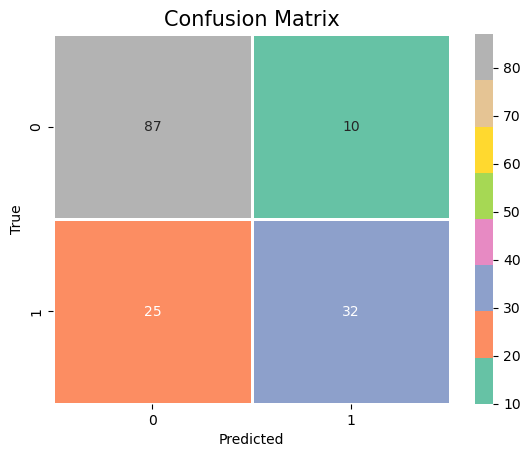

In [61]:
from sklearn.linear_model import LogisticRegression
LogR= LogisticRegression()
LogR.fit(X_train,Y_train)
Y_pred= LogR.predict(X_test)

LogR_accuracy= round(accuracy_score(Y_test,Y_pred),5)*100

impressions(LogR,LogR_accuracy)

Y_score = LogR.predict_proba(X_test)[:,1]
roc=roc_curve(Y_test,Y_score)
roc

In [62]:
results_df = pd.DataFrame(data=[["Logistic Regression", LogR_accuracy]], 
                          columns=['Model', 'Accuracy %'])
results_df

,Model,Accuracy %
0,Logistic Regression,77.273


Accuracy: 79.221 %
Mean squared error:  0.208


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



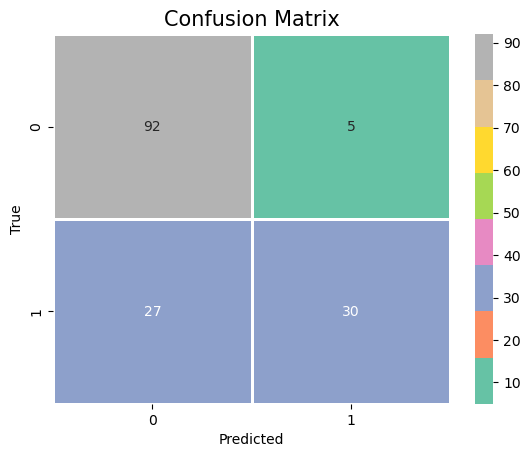

In [63]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(KNN,KNN_accuracy)

Y_score = KNN.predict_proba(X_test)[:,1]
roc=roc_curve(Y_test,Y_score)
roc

In [64]:
results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", KNN_accuracy]], 
                          columns=['Model', 'Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\saime\AppData\Local\Temp\ipykernel_1688\3404372434.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,Accuracy %
0,Logistic Regression,77.273
1,K-nearest neighbors,79.221


Accuracy: 82.468 %
Mean squared error:  0.175


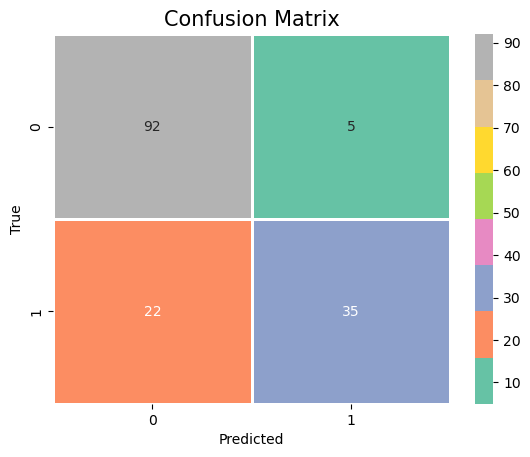

In [65]:
from sklearn.svm import SVC

svc= SVC(kernel='rbf')
svc.fit(X_train,Y_train)
Y_pred= svc.predict(X_test)

svc_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(svc,svc_accuracy)
roc_curve(Y_test,Y_pred)

In [66]:
results_df_2 = pd.DataFrame(data=[["SVC", svc_accuracy]], 
                          columns=['Model', 'Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\saime\AppData\Local\Temp\ipykernel_1688\4159789594.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,Accuracy %
0,Logistic Regression,77.273
1,K-nearest neighbors,79.221
2,SVC,82.468


Accuracy: 80.51899999999999 %
Mean squared error:  0.195


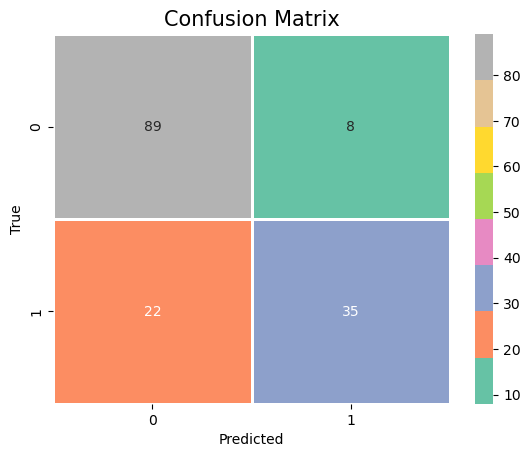

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200, random_state=5, criterion='gini', max_depth=100)
rfc.fit(X_train,Y_train)
Y_pred= rfc.predict(X_test)

rfc_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(rfc,rfc_accuracy)
roc_curve(Y_test,Y_pred)

In [68]:
results_df_2 = pd.DataFrame(data=[["RandomForest", rfc_accuracy]], 
                          columns=['Model', 'Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\saime\AppData\Local\Temp\ipykernel_1688\1316001187.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,Accuracy %
0,Logistic Regression,77.273
1,K-nearest neighbors,79.221
2,SVC,82.468
3,RandomForest,80.519


Accuracy: 75.325 %
Mean squared error:  0.247


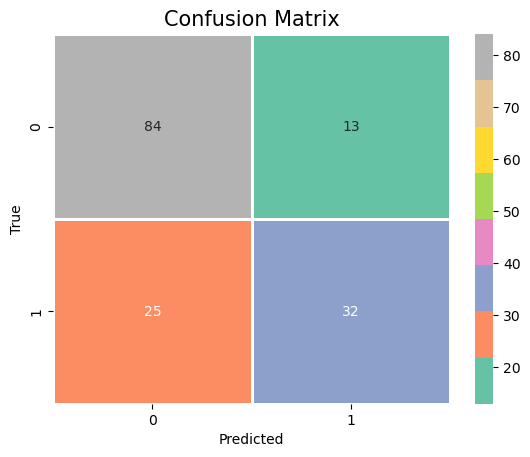

In [69]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10, max_depth=100)
tree.fit(X_train,Y_train)
Y_pred= tree.predict(X_test)

tree_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(tree,tree_accuracy)

Y_score = tree.predict_proba(X_test)[:,1]
roc_curve(Y_test,Y_pred)

In [70]:

results_df_2 = pd.DataFrame(data=[["DecisionTree", tree_accuracy]], 
                          columns=['Model', 'Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


C:\Users\saime\AppData\Local\Temp\ipykernel_1688\617509460.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,Accuracy %
0,Logistic Regression,77.273
1,K-nearest neighbors,79.221
2,SVC,82.468
3,RandomForest,80.519
4,DecisionTree,75.325
